In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 871.5 kB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.9 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.8 MB/s eta 0:00:00


In [4]:
train_df = pd.read_csv("C:\\Users\\MY PC\\.jupyter\\lab\\train.csv")
test_df = pd.read_csv("C:\\Users\\MY PC\\.jupyter\\lab\\titanic\\test.csv")
submission = pd.read_csv("C:\\Users\\MY PC\\.jupyter\\lab\\titanic\\gender_submission.csv")


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
764,765,0,3,"Eklund, Mr. Hans Linus",male,16.0,0,0,347074,7.7750,NaN,S
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
222,223,0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,NaN,S
582,583,0,2,"Downton, Mr. William James",male,54.0,0,0,28403,26.0000,NaN,S
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
658,659,0,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.0000,NaN,S
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C


In [8]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_df.shape

(891, 12)

In [10]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
for column in train_df.columns:
    if train_df[column].dtype == 'object':  # Check if the column contains categorical data
        mode_val = train_df[column].mode()[0]  # Calculate the mode for categorical columns
        train_df[column].fillna(mode_val, inplace=True)

C:\Users\MY PC\AppData\Local\Temp\ipykernel_10224\4017961195.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[column].fillna(mode_val, inplace=True)


In [15]:
for column in test_df.columns:
    if test_df[column].dtype == 'object':  # Check if the column contains categorical data
        mode_val = test_df[column].mode()[0]  # Calculate the mode for categorical columns
        test_df[column].fillna(mode_val, inplace=True)

C:\Users\MY PC\AppData\Local\Temp\ipykernel_10224\4128342631.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[column].fillna(mode_val, inplace=True)


In [16]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [17]:
train_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [18]:
train_df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [19]:
train_df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [20]:
train_df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [21]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
for column in train_df.columns:
    if train_df[column].dtype == 'object':  # Check if the column contains categorical data
        mode_val = train_df[column].mode()[0]  # Calculate the mode for categorical columns
        train_df[column].fillna(mode_val, inplace=True)

C:\Users\MY PC\AppData\Local\Temp\ipykernel_10224\4017961195.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[column].fillna(mode_val, inplace=True)


In [24]:
surv_train_df = train_df[train_df['Survived'] == 1]
surv_train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [26]:
pclass_list = train_df['Pclass'].value_counts().index.to_list()
pclass_list.sort()
surv_rate_pclass = [1, 1, 1]
for i, pclass in enumerate(pclass_list):
    surv_rate_pclass[i] = len(train_df['Pclass'][train_df['Survived'] == 1][train_df['Pclass'] == pclass]) / len(train_df['Pclass'][train_df['Pclass'] == pclass])
surv_rate_pclass = pd.DataFrame({'Pclass' : pclass_list, 'Survival Rate' : surv_rate_pclass})
surv_rate_pclass

,Pclass,Survival Rate
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [27]:
fare_surv = train_df['Fare'][train_df['Survived'] == 1].median()
fare_cas = train_df['Fare'][train_df['Survived'] == 0].median()
fare_desc = pd.DataFrame({'surv' : [0,1], 'median_fare' : [fare_cas,fare_surv]}, index = [0, 1])
fare_desc

,surv,median_fare
0,0,10.5
1,1,26.0


In [28]:
fem_surv_rate = len(train_df.loc[(train_df['Survived'] == 1) & (train_df['Sex'] == 'female')]) / len(train_df.loc[train_df['Sex'] == 'female'])
mal_surv_rate = len(train_df.loc[(train_df['Survived'] == 1) & (train_df['Sex'] == 'male')]) / len(train_df.loc[train_df['Sex'] == 'male'])
print('Female Survival Rate: ', fem_surv_rate)
print('Male Survival Rate: ', mal_surv_rate)

Female Survival Rate:  0.7420382165605095
Male Survival Rate:  0.18890814558058924


In [29]:
embarked_values = train_df['Embarked'].value_counts().index.to_list()
embarked_survival = [1, 1, 1]
for i in range(len(embarked_values)):
    surv_rate = len(train_df[(train_df['Embarked'] == embarked_values[i]) & (train_df['Survived'] == 1)]) / len(train_df[train_df['Embarked'] == embarked_values[i]])
    embarked_survival[i] = surv_rate
result = pd.DataFrame({'port': embarked_values, 'surv_rate' : embarked_survival})
print(result)

  port  surv_rate
0    S   0.339009
1    C   0.553571
2    Q   0.389610


<Axes: xlabel='port', ylabel='med_fare'>

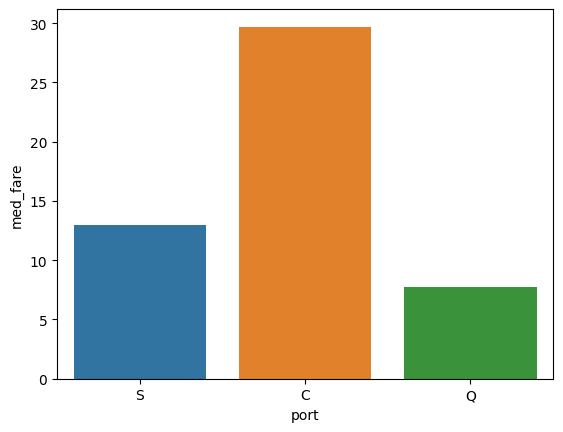

In [30]:
fare_s = train_df['Fare'][train_df['Embarked'] == 'S'].median()
fare_c = train_df['Fare'][train_df['Embarked'] == 'C'].median()
fare_q = train_df['Fare'][train_df['Embarked'] == 'Q'].median()
fare_port_data = pd.DataFrame({'med_fare' : [fare_s, fare_c, fare_q],'port' : ['S', 'C', 'Q']})
order = ['S', 'C', 'Q']
sns.barplot(data = fare_port_data, x = 'port', y = 'med_fare', hue = 'port')

<Axes: xlabel='Pclass', ylabel='Count'>

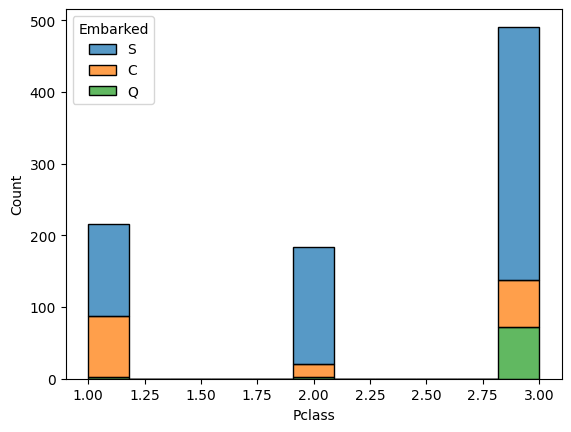

In [31]:
sns.histplot(data = train_df, x = 'Pclass', hue = 'Embarked', multiple = 'stack')

<Axes: xlabel='Age', ylabel='Count'>

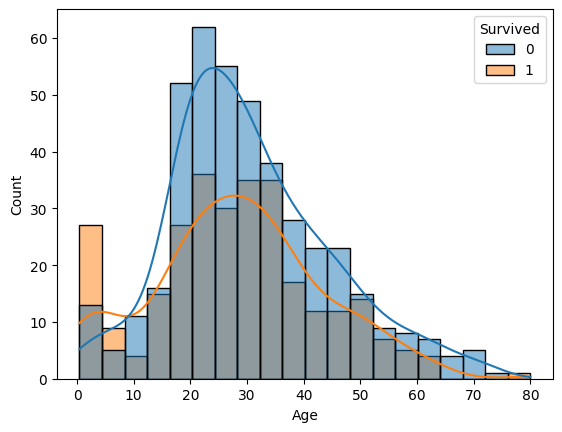

In [42]:
sns.histplot(data = train_df, x = 'Age', hue = 'Survived', kde = True, label = 'all_data')

In [43]:
age_means = train_df.groupby(['Pclass', 'Sex'])['Age'].mean()
age_means


Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

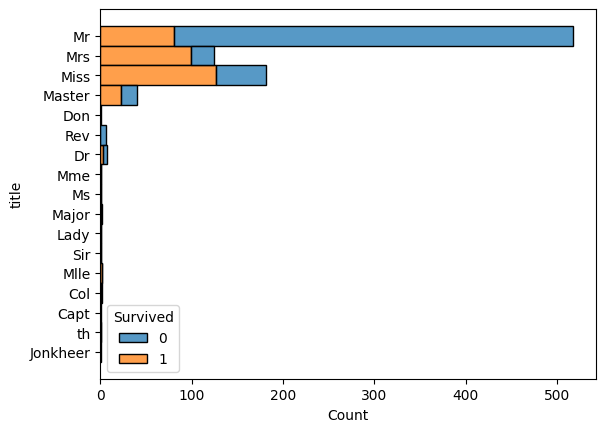

In [44]:
split_name = train_df['Name'].str.split(', ', expand = True)
title = split_name[1].str.split(". ", n = 1).str[0]
train_df['title'] = title
split_name = test_df['Name'].str.split(', ', expand = True)
title_test = split_name[1].str.split(". ", n = 1).str[0]
test_df['title'] = title_test
histplot = sns.histplot(data = train_df, y = 'title', hue = 'Survived', multiple = 'stack')

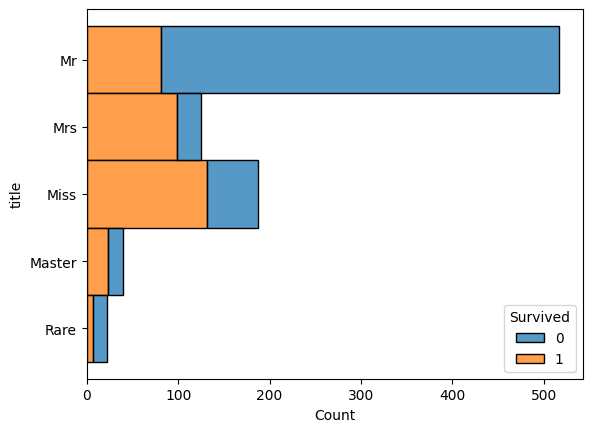

In [47]:
train_df['title'] = train_df['title'].replace(['Dr', 'Rev', 'Major', 'Col', 'th', 'Capt', 'Sir', 'Don', 'Jonkheer'], 'Rare')
test_df['title'] = test_df['title'].replace(['Dr', 'Rev', 'Major', 'Col', 'th', 'Capt', 'Sir', 'Don', 'Jonkheer'], 'Rare')
train_df['title'] = train_df['title'].replace(['Mlle', 'Ms', 'Lady', 'Mme', 'Dona'], 'Miss')
test_df['title'] = test_df['title'].replace(['Mlle', 'Ms', 'Lady', 'Mme', 'Dona'], 'Miss')
histplot = sns.histplot(data = train_df, y = 'title', hue = 'Survived', multiple = 'stack')